In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data=tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/Machine Learning/Learner's Space ML Assignments/Week2NN/data/homer_bart",batch_size=32,image_size=(64,64))

Found 269 files belonging to 2 classes.


In [5]:
train_size=int(len(data)*0.9)
test_size=int(len(data)*0.1)+1
print(train_size)
print(test_size)
print(len(data))

8
1
9


In [ ]:
data=data.map(lambda x,y:(x/255,y))

In [ ]:
data_iterator=data.as_numpy_iterator()

In [ ]:
batch=data_iterator.next()

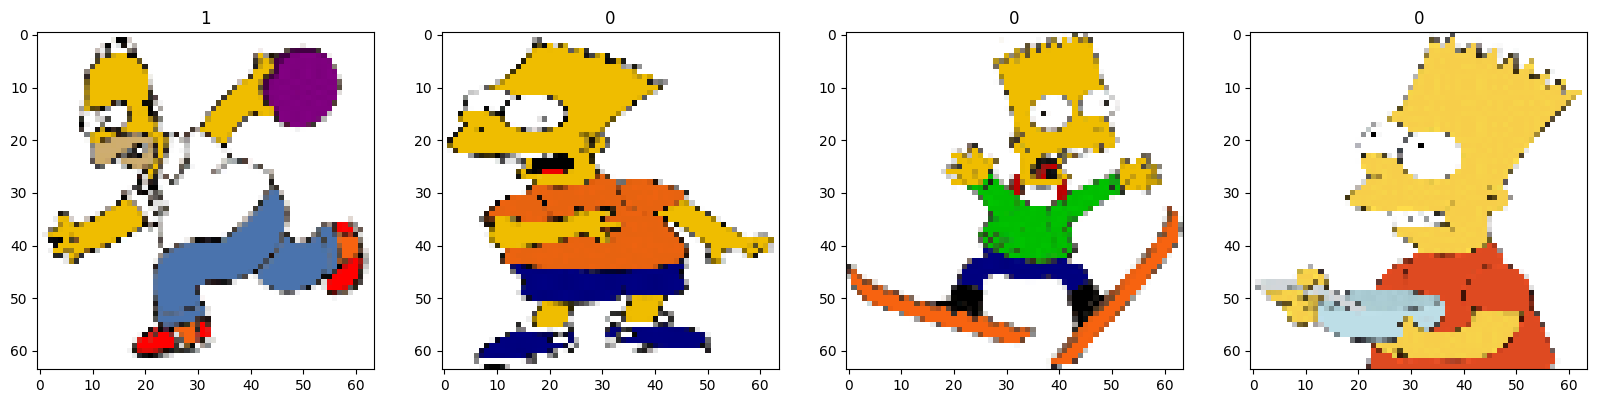

In [ ]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [6]:

x_train=data.take(train_size)
x_test=data.skip(train_size).take(test_size)

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam,SGD

In [8]:
model=Sequential([tf.keras.layers.InputLayer(input_shape=(64, 64, 3)),Flatten(),Dense(128,activation='relu'),Dense(64,activation='relu'),Dense(1,activation='sigmoid')])

In [9]:
model.compile(loss=BinaryCrossentropy(),optimizer=Adam(),metrics=['Accuracy'])


In [10]:
model.fit(x_train,epochs=40)

Epoch 1/40
8/8 [==============================] - 58s 5ms/step - loss: 1056.7742 - Accuracy: 0.4766
Epoch 2/40
8/8 [==============================] - 1s 4ms/step - loss: 446.7630 - Accuracy: 0.5156
Epoch 3/40
8/8 [==============================] - 1s 6ms/step - loss: 114.7733 - Accuracy: 0.5977
Epoch 4/40
8/8 [==============================] - 1s 6ms/step - loss: 144.9560 - Accuracy: 0.6250
Epoch 5/40
8/8 [==============================] - 1s 7ms/step - loss: 75.7306 - Accuracy: 0.6914
Epoch 6/40
8/8 [==============================] - 1s 5ms/step - loss: 33.4241 - Accuracy: 0.7656
Epoch 7/40
8/8 [==============================] - 1s 4ms/step - loss: 18.0492 - Accuracy: 0.8086
Epoch 8/40
8/8 [==============================] - 1s 4ms/step - loss: 20.7628 - Accuracy: 0.7695
Epoch 9/40
8/8 [==============================] - 1s 4ms/step - loss: 22.4029 - Accuracy: 0.7695
Epoch 10/40
8/8 [==============================] - 1s 4ms/step - loss: 58.8944 - Accuracy: 0.6484
Epoch 11/40
8/8 [======

In [11]:
loss, accuracy = model.evaluate(x_test)

1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - Accuracy: 1.0000
